In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/Code/

/content/gdrive/MyDrive/Code


In [ ]:
# p_df = pd.read_json("virgool_removed_word_112_4.json" )
# p_df.head(3)

import pandas as pd
df = pd.read_csv('drug_dataset.csv')
df = pd.DataFrame(df)
df.head(1)

,Section_Number,Link,drug_name,title,text
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...


##1- Spacy transformers

https://techblog.assignar.com/how-to-use-bert-sentence-embedding-for-clustering-text/

In [ ]:
!pip install -q -U spacy

     |████████████████████████████████| 6.4 MB 7.9 MB/s 
     |████████████████████████████████| 621 kB 47.2 MB/s 
     |████████████████████████████████| 456 kB 41.3 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 10.1 MB 44.1 MB/s 


In [ ]:
## Install libraries
! python -m pip install -q --upgrade pip --quiet
# ! pip install spacy --quiet
! pip3 install -q spacy-transformers --quiet
! python -m spacy download en_trf_bertbaseuncased_lg --quiet

In [ ]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')

from nltk.corpus import stopwords
stop = stopwords.words('english')

import pandas as pd
from nltk.stem.snowball import SnowballStemmer

from nltk.tokenize import regexp_tokenize , word_tokenize
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


####Preprocess

In [ ]:
df["question"] = df["title"].str.lower()#.str.split()
df["question"] = df["question"].str.replace('[^\w\s]',' ')
#####################################
custom_stop_word_list = ['whi']
stop = custom_stop_word_list + stop

df["question"] = df["question"].apply(lambda x: [item for item in w_tokenizer.tokenize(x) if item not in stop])
#####################################


# Use English stemmer.
stemmer = SnowballStemmer("english")
# df["stemmed"] = df["title"].str.split()
df['question'] = df["question"].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

# df = df.drop(columns=['stemmed']) # Get rid of the unstemmed column.
#####################################
tokenized_docss = []
def _remove(text):
    s = " "
    s = s.join(text) 
    return (s)

z = df['question'].apply(_remove)
df['question'] = pd.DataFrame(z)
#####################################

df.head(3)

,Section_Number,Link,drug_name,title,text,question
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...,medic prescrib
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...,medicin use
2,3,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Other uses for this medicine,This medication may be prescribed for other us...,use medicin


In [ ]:
# !python -m spacy download en_core_web_lg

In [ ]:
#Load bert model
# nlp = en_trf_bertbaseuncased_lg.load()
import spacy
nlp = spacy.load('en_core_web_lg')

# Utility function for generating sentence embedding from the text
def get_embeddinngs(text):
    return nlp(text).vector

# Generating sentence embedding from the text
df['emb'] = df['question'].apply(get_embeddinngs)
df.head(2)

,Section_Number,Link,drug_name,title,text,question,emb
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...,medic prescrib,"[-0.14481, -0.160035, 0.016703, 0.128385, 0.15..."
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...,medicin use,"[0.013169499, 0.051265, -0.083975, -0.498005, ..."


In [ ]:
# df['emb'][0]

###Apply Kmeans by
1- from nltk.cluster import KMeansClusterer

2- from sklearn import cluster

In [ ]:
## Import libraries
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np

# def clustering_question(data,NUM_CLUSTERS = 15):
NUM_CLUSTERS = 6
# sentences = df['text']

X = np.array(df['emb'].tolist())

kclusterer = KMeansClusterer(
    NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance,
    repeats=25,avoid_empty_clusters=True)

assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

df['intent'] = pd.Series(assigned_clusters, index=df.index)
df['centroid'] = df['intent'].apply(lambda x: kclusterer.means()[x])
# df, assigned_clusters

/usr/local/lib/python3.7/dist-packages/nltk/cluster/util.py:133: RuntimeWarning: invalid value encountered in true_divide
  sqrt(numpy.dot(u, u)) * sqrt(numpy.dot(v, v))))


In [ ]:
df.head(3)

,Section_Number,Link,drug_name,title,text,question,emb,intent,centroid
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...,medic prescrib,"[-0.14481, -0.160035, 0.016703, 0.128385, 0.15...",1,"[-0.06919604, 0.065619245, -0.055397186, -0.01..."
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...,medicin use,"[0.013169499, 0.051265, -0.083975, -0.498005, ...",0,"[0.022474669, 0.057505026, -0.08554547, -0.495..."
2,3,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Other uses for this medicine,This medication may be prescribed for other us...,use medicin,"[0.013169499, 0.051265, -0.083975, -0.498005, ...",0,"[0.022474669, 0.057505026, -0.08554547, -0.495..."


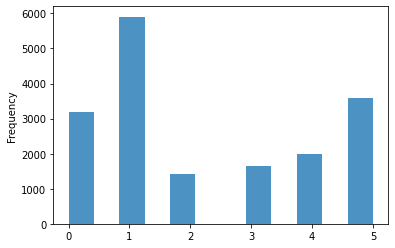

In [ ]:
ax = df['intent'].plot.hist(bins=12, alpha=0.8)

In [ ]:
from sklearn import cluster
from sklearn import metrics
import nltk


NUM_CLUSTERS = 6
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(len(labels)):
  df["intent"][i]  = labels[i]
 
#######################################
print("Cluster id labels for inputted data")
print(labels)
print("Centroids data")
print(centroids)

print("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print(kmeans.score(X))

silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

print("Silhouette_score: ")
print(silhouette_score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Cluster id labels for inputted data
[2 1 1 ... 2 5 4]
Centroids data
[[ 8.0441711e-03 -5.4485410e-02 -1.3451350e-01 ... -7.4171990e-02
   1.9570577e-01 -1.1123717e-02]
 [ 1.3176006e-02  5.1274918e-02 -8.3924510e-02 ... -4.1061780e-01
   3.1516260e-01  7.0230132e-01]
 [-6.4642906e-02  6.8548985e-02 -5.6650981e-02 ...  1.4779010e-01
   6.1625399e-02  1.2144714e-01]
 [-1.9823459e-01  2.9922354e-01 -1.5524906e-01 ... -1.6673401e-01
   3.9571524e-04  8.3947837e-02]
 [ 3.1062749e-01  2.1171831e-01 -4.2121416e-01 ... -1.8228126e-01
   5.5935130e-02  2.7541941e-01]
 [ 8.7749556e-02  1.2109320e-01 -5.7323289e-01 ... -2.0021688e-02
   2.3504323e-01  1.7753403e-01]]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-43091.09
Silhouette_score: 
0.6571056


In [ ]:
df.head(3)

,Section_Number,Link,drug_name,title,text,question,emb,intent,centroid
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...,medic prescrib,"[-0.14481, -0.160035, 0.016703, 0.128385, 0.15...",2,"[-0.08483781, -0.08588089, -0.0087239295, 0.01..."
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...,medicin use,"[0.013169499, 0.051265, -0.083975, -0.498005, ...",1,"[0.013005686, 0.051259067, -0.083906785, -0.49..."
2,3,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Other uses for this medicine,This medication may be prescribed for other us...,use medicin,"[0.013169499, 0.051265, -0.083975, -0.498005, ...",1,"[0.013005686, 0.051259067, -0.083906785, -0.49..."


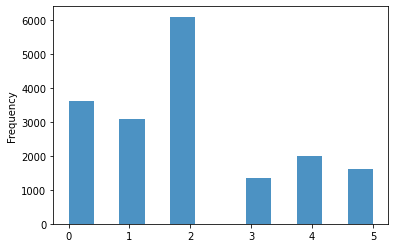

In [ ]:
ax = df['intent'].plot.hist(bins=12, alpha=0.8)

##2- Bert

https://theaidigest.in/how-to-cluster-text-documents-using-bert/

In [ ]:
!pip install -q -U sentence-transformers

In [ ]:
!pip install -q -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [ ]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [ ]:
df["question"] = df["title"].str.lower()#.str.split()
df["question"] = df["question"].str.replace('[^\w\s]',' ')
#####################################
custom_stop_word_list = ['whi']
stop = custom_stop_word_list + stop

df["question"] = df["question"].apply(lambda x: [item for item in w_tokenizer.tokenize(x) if item not in stop])
#####################################


# Use English stemmer.
stemmer = SnowballStemmer("english")
# df["stemmed"] = df["title"].str.split()
df['question'] = df["question"].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

# df = df.drop(columns=['stemmed']) # Get rid of the unstemmed column.
#####################################
tokenized_docss = []
def _remove(text):
    s = " "
    s = s.join(text) 
    return (s)

z = df['question'].apply(_remove)
df['question'] = pd.DataFrame(z)
#####################################

df.head(3)

,Section_Number,Link,drug_name,title,text,question
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...,medic prescrib
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...,medicin use
2,3,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Other uses for this medicine,This medication may be prescribed for other us...,use medicin


In [ ]:
corpus_embeddings = embedder.encode(df['question'])

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 6
# Define kmeans model
clustering_model = KMeans(n_clusters=num_clusters)

# Fit the embedding with kmeans clustering.
clustering_model.fit(corpus_embeddings)

# Get the cluster id assigned to each news headline.
cluster_assignment = clustering_model.labels_

In [ ]:
from sklearn import cluster
from sklearn import metrics
import nltk


labels = kmeans.labels_
centroids = kmeans.cluster_centers_


 
#######################################
print("Cluster id labels for inputted data")
print(labels)
print("Centroids data")
print(centroids)

print("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print(kmeans.score(X))

silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

print("Silhouette_score: ")
print(silhouette_score)

Cluster id labels for inputted data
[2 1 1 ... 2 5 4]
Centroids data
[[ 8.0441711e-03 -5.4485410e-02 -1.3451350e-01 ... -7.4171990e-02
   1.9570577e-01 -1.1123717e-02]
 [ 1.3176006e-02  5.1274918e-02 -8.3924510e-02 ... -4.1061780e-01
   3.1516260e-01  7.0230132e-01]
 [-6.4642906e-02  6.8548985e-02 -5.6650981e-02 ...  1.4779010e-01
   6.1625399e-02  1.2144714e-01]
 [-1.9823459e-01  2.9922354e-01 -1.5524906e-01 ... -1.6673401e-01
   3.9571524e-04  8.3947837e-02]
 [ 3.1062749e-01  2.1171831e-01 -4.2121416e-01 ... -1.8228126e-01
   5.5935130e-02  2.7541941e-01]
 [ 8.7749556e-02  1.2109320e-01 -5.7323289e-01 ... -2.0021688e-02
   2.3504323e-01  1.7753403e-01]]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-43091.09
Silhouette_score: 
0.6571056


In [ ]:
print(cluster_assignment)

[1 2 2 ... 0 4 3]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
df["intent"] = ""

for i in range(len(cluster_assignment)):
  df["intent"][i]  = cluster_assignment[i]
  # print(df.title[i] , assigned_clusters[i]) 
# Getting the cluster centers

print("**************************************************")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**************************************************


In [ ]:
df.head(2)

,Section_Number,Link,drug_name,title,text,question,intent
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...,medic prescrib,1
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...,medicin use,2


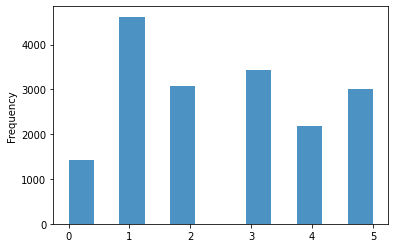

In [ ]:
ax = df['intent'].plot.hist(bins=12, alpha=0.8)

##Doc2vec
https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/

In [ ]:
df.head(2)

,Section_Number,Link,drug_name,title,text,question
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...,medic prescrib
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...,medicin use


In [ ]:
df["text_Preproce"] = df["text"].str.lower()#.str.split()
df["text_Preproce"] = df["text_Preproce"].str.replace('[^\w\s]',' ')
#####################################
custom_stop_word_list = ['whi']
stop = custom_stop_word_list + stop

df["text_Preproce"] = df["text_Preproce"].apply(lambda x: [item for item in w_tokenizer.tokenize(x) if item not in stop])
#####################################


# Use English stemmer.
stemmer = SnowballStemmer("english")
# df["stemmed"] = df["title"].str.split()
df['text_Preproce'] = df["text_Preproce"].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

# df = df.drop(columns=['stemmed']) # Get rid of the unstemmed column.
#####################################
tokenized_docss = []
def _remove(text):
    s = " "
    s = s.join(text) 
    return (s)

z = df['text_Preproce'].apply(_remove)
df['text_Preproce'] = pd.DataFrame(z)
#####################################

df.head(2)

,Section_Number,Link,drug_name,title,text,question,text_Preproce
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...,medic prescrib,dalfampridin use improv walk peopl multipl scl...
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...,medicin use,dalfampridin come extend releas tablet take mo...


In [ ]:
# import
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
df.dropna(subset = ["text_Preproce"], inplace=True)
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(df["text_Preproce"])]
# tagged_data

In [ ]:
## Train doc2vec model
model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 100)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
# model.wv.vocab

'\nvector_size = Dimensionality of the feature vectors.\nwindow = The maximum distance between the current and predicted word within a sentence.\nmin_count = Ignores all words with total frequency lower than this.\nalpha = The initial learning rate.\n'

In [ ]:
def get_embeddinngs(text):
    return  model.infer_vector(text)

# Generating sentence embedding from the text
df['emb_New'] = df['question'].apply(get_embeddinngs)

In [ ]:
df.head(2)

,Section_Number,Link,drug_name,title,text,question,text_Preproce,emb_New
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...,medic prescrib,dalfampridin use improv walk peopl multipl scl...,"[0.16772282, 0.071075074, -0.11208128, 0.26545..."
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...,medicin use,dalfampridin come extend releas tablet take mo...,"[0.114665054, 0.21461496, -0.11354246, 0.08148..."


In [ ]:
# type(df['intent'][0])

int

In [ ]:
# df.drop('intent', inplace=True, axis=1)

In [ ]:
df.head(2)

,Section_Number,Link,drug_name,title,text,question,text_Preproce,emb_New,cluster,centroid,intent
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...,medic prescrib,dalfampridin use improv walk peopl multipl scl...,"[0.16772282, 0.071075074, -0.11208128, 0.26545...",4,"[0.13428995, 0.061471272, -0.16710436, 0.26398...",1
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...,medicin use,dalfampridin come extend releas tablet take mo...,"[0.114665054, 0.21461496, -0.11354246, 0.08148...",2,"[0.074623585, 0.23444764, -0.1196898, -0.00156...",1


In [ ]:
## Import libraries
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np

# def clustering_question(data,NUM_CLUSTERS = 15):
NUM_CLUSTERS = 6

X = np.array(df['emb_New'].tolist())

kclusterer = KMeansClusterer(
    NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance,
    repeats=25,avoid_empty_clusters=True)

assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

df['cluster'] = pd.Series(assigned_clusters, index=df.index)
df['centroid'] = df['cluster'].apply(lambda x: kclusterer.means()[x])
# df, assigned_clusters

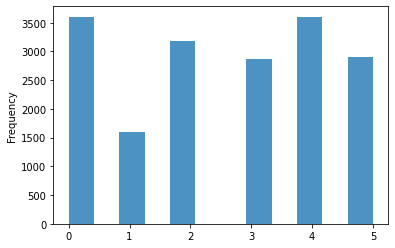

In [ ]:
ax = df['cluster'].plot.hist(bins=12, alpha=0.8)

In [ ]:
test_doc = word_tokenize("I had pizza and pasta".lower())
test_doc_vector = model.infer_vector(test_doc)

'''
positive = List of sentences that contribute positively.
'''
model.docvecs.most_similar(positive = [test_doc_vector])



[(23, 0.2791650593280792),
 (17, 0.20014172792434692),
 (75, 0.19645734131336212),
 (85, 0.1653636395931244),
 (81, 0.1634170413017273),
 (95, 0.16275329887866974),
 (15, 0.15630249679088593),
 (87, 0.15292072296142578),
 (96, 0.15206947922706604),
 (54, 0.14647649228572845)]

##ُWord2vec Sentence Embeding with Pretrained google's Model

https://dylancastillo.co/nlp-snippets-cluster-documents-using-word2vec/

In [ ]:
import os
import random
import re
import string

import nltk
import numpy as np
import pandas as pd

from gensim.models import Word2Vec

from nltk import word_tokenize
from nltk.corpus import stopwords

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

nltk.download("stopwords")

SEED = 42
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_text(text, tokenizer, stopwords):
    """Pre-process text and generate tokens

    Args:
        text: Text to tokenize.

    Returns:
        Tokenized text.
    """
    text = str(text).lower()  # Lowercase words
    text = re.sub(r"\[(.*?)\]", "", text)  # Remove [+XYZ chars] in content
    text = re.sub(r"\s+", " ", text)  # Remove multiple spaces in content
    text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
    text = re.sub(r"(?<=\w)-(?=\w)", " ", text)  # Replace dash between words
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", "", text
    )  # Remove punctuation

    tokens = tokenizer(text)  # Get tokens from text
    tokens = [t for t in tokens if not t in stopwords]  # Remove stopwords
    tokens = ["" if t.isdigit() else t for t in tokens]  # Remove digits
    tokens = [t for t in tokens if len(t) > 1]  # Remove short tokens
    return tokens

In [ ]:
custom_stopwords = set(stopwords.words("english") + ["news", "new", "top"])
text_columns = ["title"]

# df = df_raw.copy()
df['title'] = df["title"].fillna("")

for col in text_columns:
    df[col] = df[col].astype(str)

# Create text column based on title, description, and content
df["title"] = df[text_columns].apply(lambda x: " | ".join(x), axis=1)
df["tokens"] = df["title"].map(lambda x: clean_text(x, word_tokenize, custom_stopwords))

# Remove duplicated after preprocessing
_, idx = np.unique(df["tokens"], return_index=True)
df = df.iloc[idx, :]

# Remove empty values and keep relevant columns
df = df.loc[df.tokens.map(lambda x: len(x) > 0), ["title", "tokens"]]

# print(f"Original dataframe: {df_raw.shape}")
print(f"Pre-processed dataframe: {df.shape}")

Pre-processed dataframe: (129, 2)


In [ ]:
model = Word2Vec(sentences=df["question"], workers=1, seed=SEED)

In [ ]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
wv.most_similar("medic")

[('corpsman', 0.7220655083656311),
 ('paramedic', 0.7170884013175964),
 ('combat_medic', 0.7073416113853455),
 ('medics', 0.656389594078064),
 ('hospital_corpsman', 0.6315622329711914),
 ('reservist', 0.6194436550140381),
 ('soldier', 0.6174983382225037),
 ('infantryman', 0.6130428910255432),
 ('Medic', 0.6077107191085815),
 ('sergeant', 0.6036056280136108)]

In [ ]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(df["question"], model=model)
len(vectorized_docs), len(vectorized_docs[0])

(129, 100)

In [ ]:
def mbkmeans_clusters(
	X, 
    k, 
    mb, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [ ]:
clustering, cluster_labels = mbkmeans_clusters(
	X=vectorized_docs,
    k=6,
    mb=500,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "title": df["title"],
    "tokens": [" ".join(text) for text in df["question"]],
    "cluster": cluster_labels
})

For n_clusters = 6
Silhouette coefficient: 0.58
Inertia:0.009871702898498192
Silhouette values:
    Cluster 5: Size:2 | Avg:1.00 | Min:1.00 | Max: 1.00
    Cluster 1: Size:20 | Avg:0.92 | Min:0.18 | Max: 0.96
    Cluster 0: Size:49 | Avg:0.80 | Min:0.04 | Max: 0.88
    Cluster 3: Size:13 | Avg:0.42 | Min:0.03 | Max: 0.58
    Cluster 4: Size:13 | Avg:0.29 | Min:-0.12 | Max: 0.51
    Cluster 2: Size:32 | Avg:0.18 | Min:-0.08 | Max: 0.35


In [ ]:
print("Most representative terms per cluster (based on centroids):")
for i in range(6):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: b anthrax vaccine hepatitis meningococcal 
Cluster 1: vaccine meningococcal johnson 19 hpv 
Cluster 2: get vaccine meningococcal hpv wait 
Cluster 3: 19 vaccine covid johnson typhoid 
Cluster 4: risks vaccine meningococcal hpv johnson 
Cluster 5: typhoid 19 hpv meningococcal risks 


In [ ]:
test_cluster = 5
most_representative_docs = np.argsort(
    np.linalg.norm(vectorized_docs - clustering.cluster_centers_[test_cluster], axis=1)
)
for d in most_representative_docs[:3]:
    print(df["title"][d])
    print("-------------")

##Plot Dataframe

In [ ]:
gear_count = pd.value_counts(df.drug_name)
len(gear_count)

1616

In [ ]:
pd.value_counts(df.drug_name[:20]).plot(kind="bar")

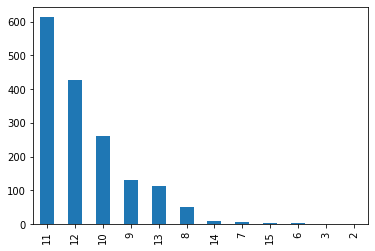

In [ ]:
s = df.groupby("drug_name").Section_Number.agg(lambda x:len(x.unique()))
pd.value_counts(s).plot(kind="bar")

In [ ]:
s

drug_name
Abacavir                                  13
Abacavir, Dolutegravir, and Lamivudine    12
Abacavir, Lamivudine, and Zidovudine      12
Abaloparatide Injection                   12
Abatacept Injection                       11
                                          ..
Zoledronic Acid Injection                 11
Zolmitriptan                              10
Zolmitriptan Nasal Spray                  10
Zolpidem                                  12
Zonisamide                                11
Name: Section_Number, Length: 1616, dtype: int64